In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [36]:
# Define the subject combinations for each field

science_subjects = [
    'English', 'Mathematics', 'Physics', 'Chemistry', 'Biology', 'Other'
]

commercial_subjects = [
    'English', 'Mathematics', 'Government', 'Commerce', 'Economics', 'Accounting'
]

arts_subjects = [
    'English', 'Literature', 'Law', 'Government', 'History', 'Other'
]

technology_subjects = [
    'English', 'Mathematics', 'Physics', 'Chemistry', 'Computer Studies', 'Data Processing'
]

In [37]:
# Define the careers for each field

science_careers = [
    "Biologist", "Chemist", "Physicist", "Geologist", "Marine Biologist",
    "Astronomer", "Microbiologist", "Meteorologist", "Environmental Scientist", "Data Scientist"
]

commercial_careers = [
    "Marketing Manager", "Sales Manager", "Accountant", "Financial Analyst", "Business Consultant",
    "Human Resources Manager", "Project Manager", "Supply Chain Manager", "Business Lawyer", "Real Estate Agent"
]

arts_careers = [
    "Visual Artist", "Musician", "Actor", "Writer", "Dancer",
    "Graphic Designer", "Fashion Designer", "Interior Designer", "Architect", "Filmmaker"
]

technology_careers = [
    "Software Engineer", "Computer Engineer", "Web Developer", "Data Analyst", "Cybersecurity Analyst",
    "Network Engineer", "Artificial Intelligence Engineer", "Robotics Engineer", "Biomedical Engineer", "Chemical Engineer"
]

In [38]:
# Excellent: Gaussian with a mean of 85 and a standard deviation of 10.
# Good: Gaussian with a mean of 70 and a standard deviation of 10.
# Average: Gaussian with a mean of 55 and a standard deviation of 10.
# Poor: Gaussian with a mean of 30 and a standard deviation of 10.
# Very Poor: Gaussian with a mean of 15 and a standard deviation of 10.

In [39]:
# Function to create fuzzy variables for a given list of subjects


def create_fuzzy_vars(subjects):
    fuzzy_vars = {}
    for subject in subjects:
        fuzzy_var = ctrl.Antecedent(np.arange(0, 101, 1), subject)
        fuzzy_var['Excellent'] = fuzz.gaussmf(fuzzy_var.universe, 85, 10)
        fuzzy_var['Good'] = fuzz.gaussmf(fuzzy_var.universe, 70, 10)
        fuzzy_var['Average'] = fuzz.gaussmf(fuzzy_var.universe, 55, 10)
        fuzzy_var['Poor'] = fuzz.gaussmf(fuzzy_var.universe, 30, 10)
        fuzzy_var['Very_Poor'] = fuzz.gaussmf(fuzzy_var.universe, 15, 10)
        fuzzy_vars[subject] = fuzzy_var
    return fuzzy_vars

#### Creating fuzzy variables for each field

In [40]:
science_fuzzy_vars = create_fuzzy_vars(science_subjects)
science_fuzzy_vars

{'English': Antecedent: English,
 'Mathematics': Antecedent: Mathematics,
 'Physics': Antecedent: Physics,
 'Chemistry': Antecedent: Chemistry,
 'Biology': Antecedent: Biology,
 'Other': Antecedent: Other}

In [41]:
commercial_fuzzy_vars = create_fuzzy_vars(commercial_subjects)
commercial_fuzzy_vars

{'English': Antecedent: English,
 'Mathematics': Antecedent: Mathematics,
 'Government': Antecedent: Government,
 'Commerce': Antecedent: Commerce,
 'Economics': Antecedent: Economics,
 'Accounting': Antecedent: Accounting}

In [42]:
arts_fuzzy_vars = create_fuzzy_vars(arts_subjects)
arts_fuzzy_vars

{'English': Antecedent: English,
 'Literature': Antecedent: Literature,
 'Law': Antecedent: Law,
 'Government': Antecedent: Government,
 'History': Antecedent: History,
 'Other': Antecedent: Other}

In [43]:
technology_fuzzy_vars = create_fuzzy_vars(technology_subjects)
technology_fuzzy_vars

{'English': Antecedent: English,
 'Mathematics': Antecedent: Mathematics,
 'Physics': Antecedent: Physics,
 'Chemistry': Antecedent: Chemistry,
 'Computer Studies': Antecedent: Computer Studies,
 'Data Processing': Antecedent: Data Processing}

#### Output variables for career recommendations

In [44]:

career_outputs = {}
for career in science_careers + commercial_careers + arts_careers + technology_careers:
    career_outputs[career] = ctrl.Consequent(np.arange(0, 1.1, 0.1), career)
    career_outputs[career]['low'] = fuzz.gaussmf(career_outputs[career].universe, 0.2, 0.1)
    career_outputs[career]['medium'] = fuzz.gaussmf(career_outputs[career].universe, 0.5, 0.1)
    career_outputs[career]['high'] = fuzz.gaussmf(career_outputs[career].universe, 0.8, 0.1)


In [45]:
career_outputs

{'Biologist': Consequent: Biologist,
 'Chemist': Consequent: Chemist,
 'Physicist': Consequent: Physicist,
 'Geologist': Consequent: Geologist,
 'Marine Biologist': Consequent: Marine Biologist,
 'Astronomer': Consequent: Astronomer,
 'Microbiologist': Consequent: Microbiologist,
 'Meteorologist': Consequent: Meteorologist,
 'Environmental Scientist': Consequent: Environmental Scientist,
 'Data Scientist': Consequent: Data Scientist,
 'Marketing Manager': Consequent: Marketing Manager,
 'Sales Manager': Consequent: Sales Manager,
 'Accountant': Consequent: Accountant,
 'Financial Analyst': Consequent: Financial Analyst,
 'Business Consultant': Consequent: Business Consultant,
 'Human Resources Manager': Consequent: Human Resources Manager,
 'Project Manager': Consequent: Project Manager,
 'Supply Chain Manager': Consequent: Supply Chain Manager,
 'Business Lawyer': Consequent: Business Lawyer,
 'Real Estate Agent': Consequent: Real Estate Agent,
 'Visual Artist': Consequent: Visual Art

In [110]:
science_rules = []
commercial_rules = []
arts_rules = []
technology_rules = []

# Example rules for science careers
science_rules.append(ctrl.Rule(science_fuzzy_vars['Mathematics']['Excellent'] & science_fuzzy_vars['Chemistry']['Excellent'], career_outputs['Chemist']['high']))
science_rules.append(ctrl.Rule(science_fuzzy_vars['Biology']['Excellent'] & science_fuzzy_vars['Chemistry']['Good'], career_outputs['Biologist']['high']))
science_rules.append(ctrl.Rule(science_fuzzy_vars['Physics']['Excellent'] & science_fuzzy_vars['Mathematics']['Excellent'], career_outputs['Physicist']['high']))
science_rules.append(ctrl.Rule(science_fuzzy_vars['English']['Good'] & science_fuzzy_vars['Other']['Good'], career_outputs['Geologist']['medium']))

# Example rules for commercial careers
commercial_rules.append(ctrl.Rule(commercial_fuzzy_vars['Economics']['Excellent'] & commercial_fuzzy_vars['Accounting']['Excellent'], career_outputs['Accountant']['high']))
commercial_rules.append(ctrl.Rule(commercial_fuzzy_vars['Government']['Good'] & commercial_fuzzy_vars['Commerce']['Good'], career_outputs['Business Consultant']['medium']))

# Example rules for arts careers
arts_rules.append(ctrl.Rule(arts_fuzzy_vars['Literature']['Excellent'] & arts_fuzzy_vars['History']['Excellent'], career_outputs['Writer']['high']))
arts_rules.append(ctrl.Rule(arts_fuzzy_vars['Law']['Good'] & arts_fuzzy_vars['Government']['Good'], career_outputs['Business Lawyer']['medium']))

# Example rules for technology careers
technology_rules.append(ctrl.Rule(technology_fuzzy_vars['Mathematics']['Excellent'] & technology_fuzzy_vars['Computer Studies']['Excellent'], career_outputs['Software Engineer']['high']))
technology_rules.append(ctrl.Rule(technology_fuzzy_vars['Physics']['Excellent'] & technology_fuzzy_vars['Chemistry']['Good'], career_outputs['Chemical Engineer']['high']))


In [111]:
control_systems = {
    'science': ctrl.ControlSystem(science_rules),
    'commercial': ctrl.ControlSystem(commercial_rules),
    'arts': ctrl.ControlSystem(arts_rules),
    'technology': ctrl.ControlSystem(technology_rules)
}

simulations = {field: ctrl.ControlSystemSimulation(control_system) for field, control_system in control_systems.items()}


In [119]:
# Function to compute career recommendations based on user inputs


def compute_recommendations(field, inputs):
    sim = simulations[field]
    
    for subject, value in inputs.items():
        sim.input[subject] = value
    
    print(sim.input)
    
    sim.compute()
    
    career_scores = {career: sim.output[career] for career in career_outputs if career in sim.output}
    sorted_careers = sorted(career_scores.items(), key=lambda item: item[1], reverse=True)
    
    return sorted_careers



In [69]:
# Function to plot membership functions

def plot_membership_functions(fuzzy_vars):
    for subject, var in fuzzy_vars.items():
        plt.figure()
        for label in var.terms:
            plt.plot(var.universe, var[label].mf, label=label)
        plt.title(f'Membership Functions for {subject}')
        plt.xlabel('Score')
        plt.ylabel('Membership')
        plt.legend()
        plt.show()


In [70]:
# Function to plot membership functions with user input markers
def plot_membership_functions_with_input(fuzzy_vars, user_inputs):
    for subject, var in fuzzy_vars.items():
        plt.figure()
        for label in var.terms:
            plt.plot(var.universe, var[label].mf, label=label)
        if subject in user_inputs:
            plt.axvline(user_inputs[subject], color='r', linestyle='--', label=f'User Input: {user_inputs[subject]}')
        plt.title(f'Membership Functions for {subject}')
        plt.xlabel('Score')
        plt.ylabel('Membership')
        plt.legend()
        plt.show()

In [124]:
# Function to plot career recommendation results

def plot_career_recommendations(recommendations):
    careers, scores = zip(*recommendations)
    plt.figure()
    plt.barh(careers, scores)
    plt.xlabel('Score')
    plt.title('Career Recommendations')
    plt.show()

In [126]:
# Function to plot career recommendation results using view
def plot_career_recommendations_with_view(sim):
    for career in sim.output:
        career_outputs[career].view(sim=sim)

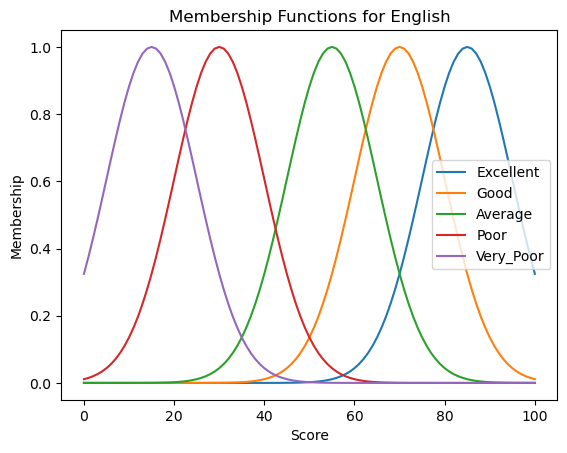

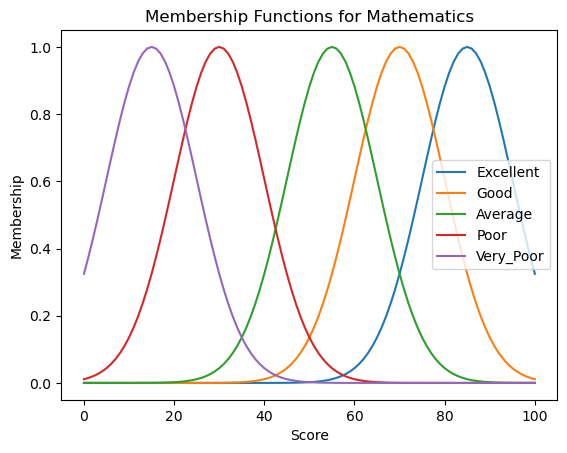

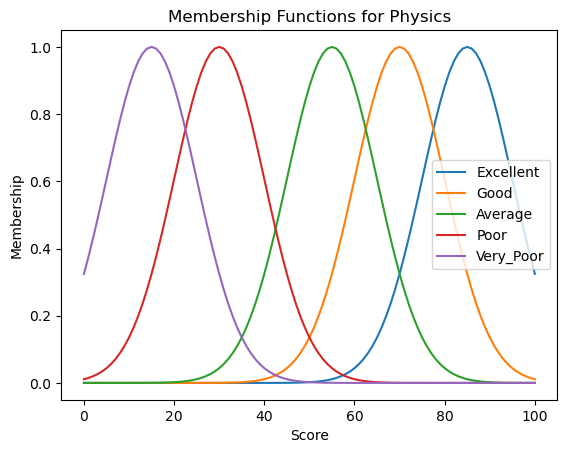

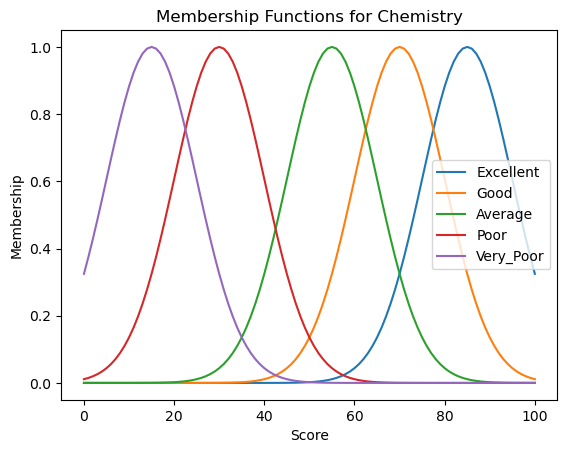

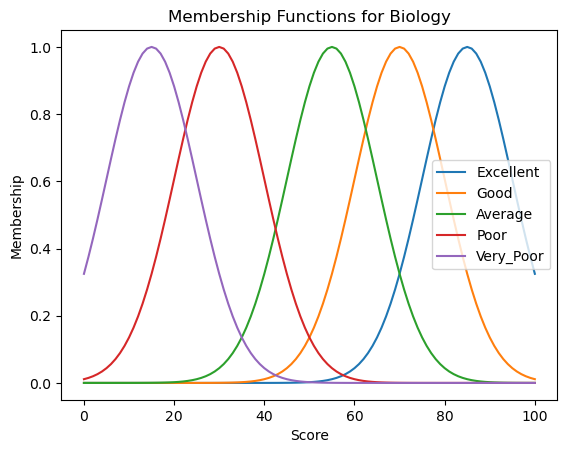

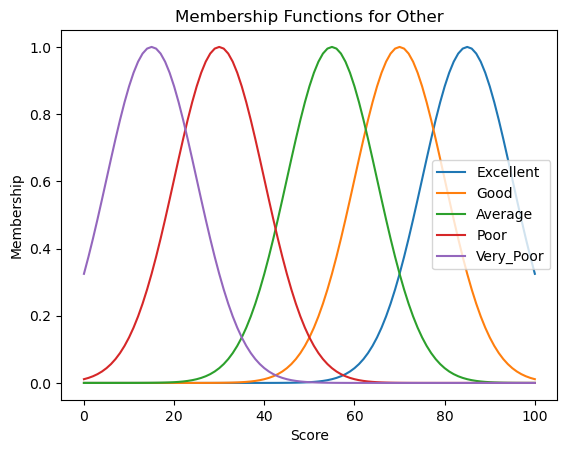

In [127]:
# Plot membership functions
plot_membership_functions(science_fuzzy_vars)

In [141]:
# Example usage


field = 'science'
user_inputs = {
    'English': 80,
    'Mathematics': 90,
    'Physics': 90,
    'Chemistry': 78,
    'Biology': 88,
    'Other': 70
}



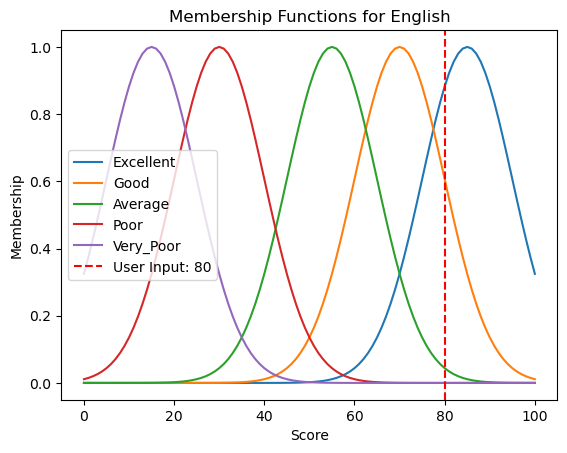

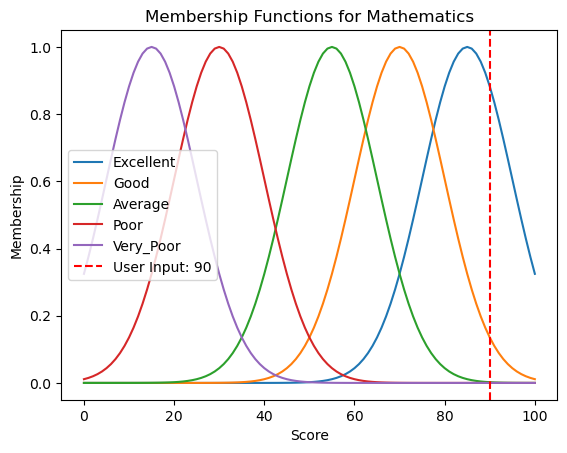

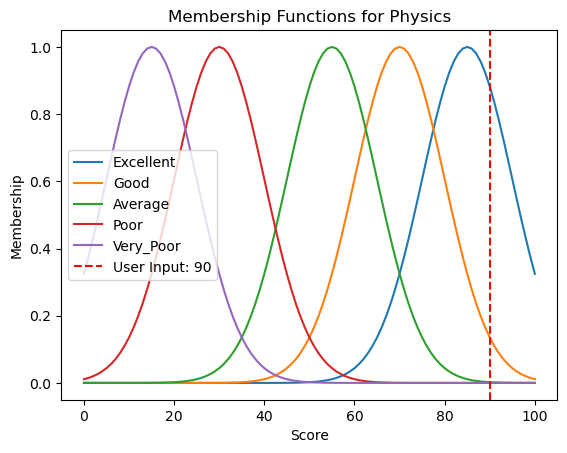

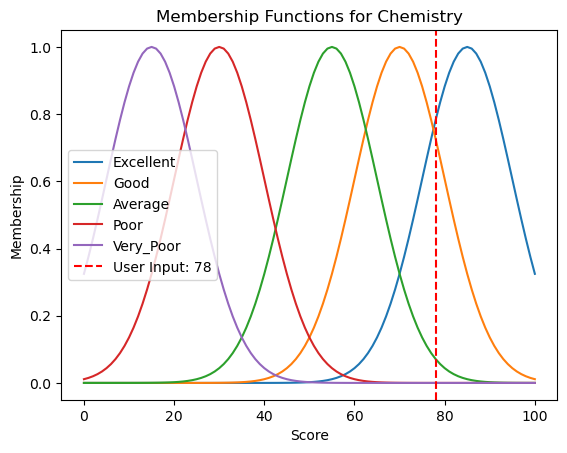

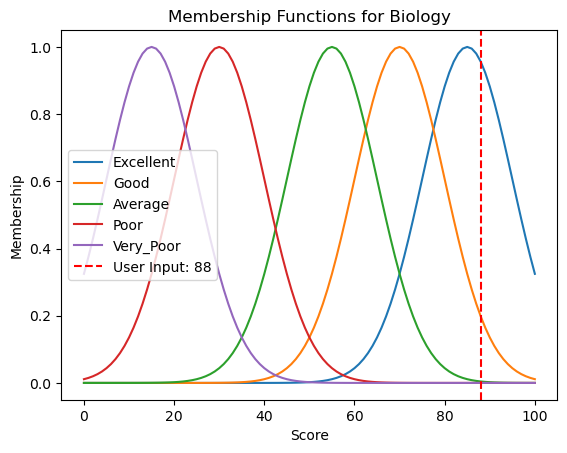

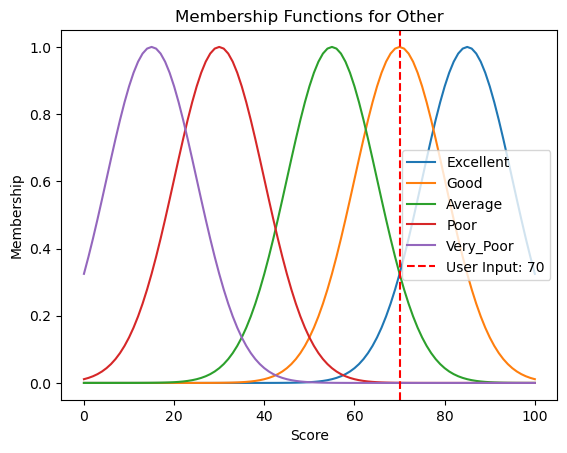

In [142]:
# Plot membership functions with user inputs

plot_membership_functions_with_input(science_fuzzy_vars, user_inputs)

In [144]:
#Engaging Inference Engine
recommendations = compute_recommendations(field, user_inputs)

Mathematics : 90
Chemistry : 78
Biology : 88
Physics : 90
English : 80
Other : 70



In [145]:
print("Career Recommendations:")
for career, score in recommendations:
    print(f"{career}: {score:.2f}")

Career Recommendations:
Physicist: 0.79
Chemist: 0.79
Biologist: 0.79
Geologist: 0.50


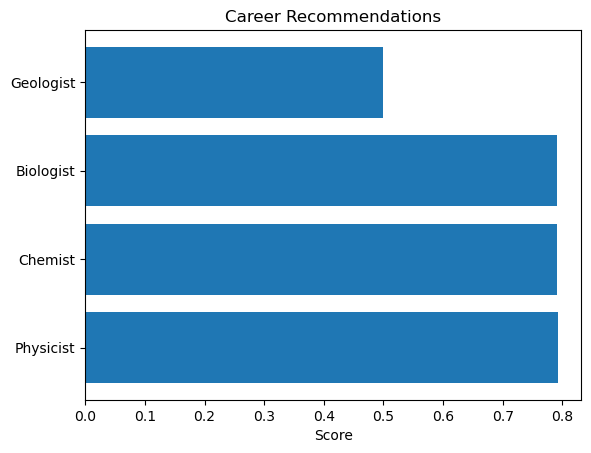

In [146]:
# Plot career recommendations
plot_career_recommendations(recommendations)

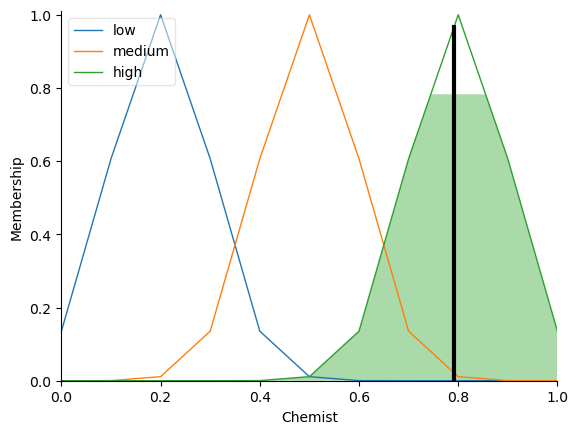

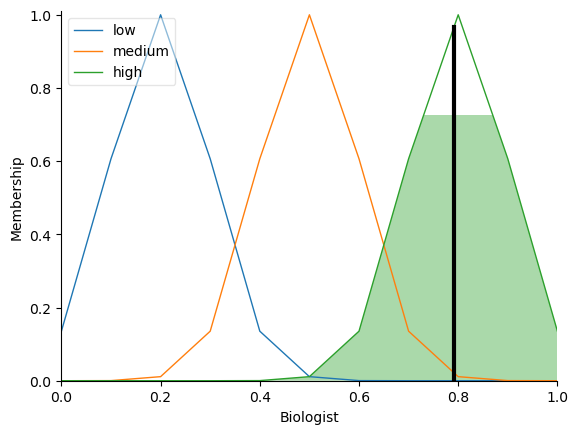

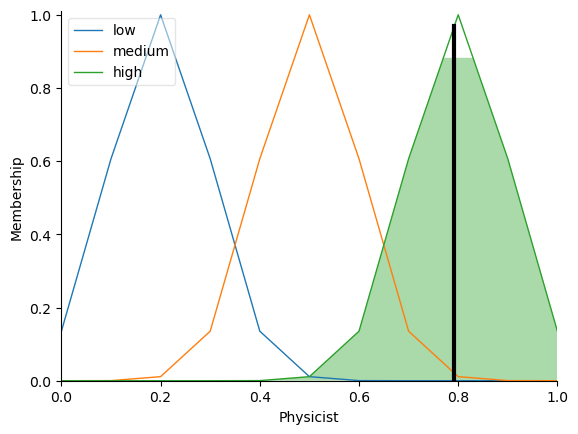

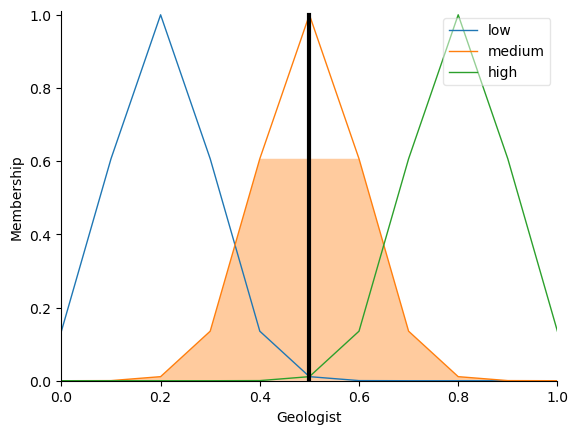

In [140]:
# Plot career recommendations using view

plot_career_recommendations_with_view(simulations[field])